# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [12]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt


## Challenge 1

#### The data we will use in this challenge is:

In [13]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

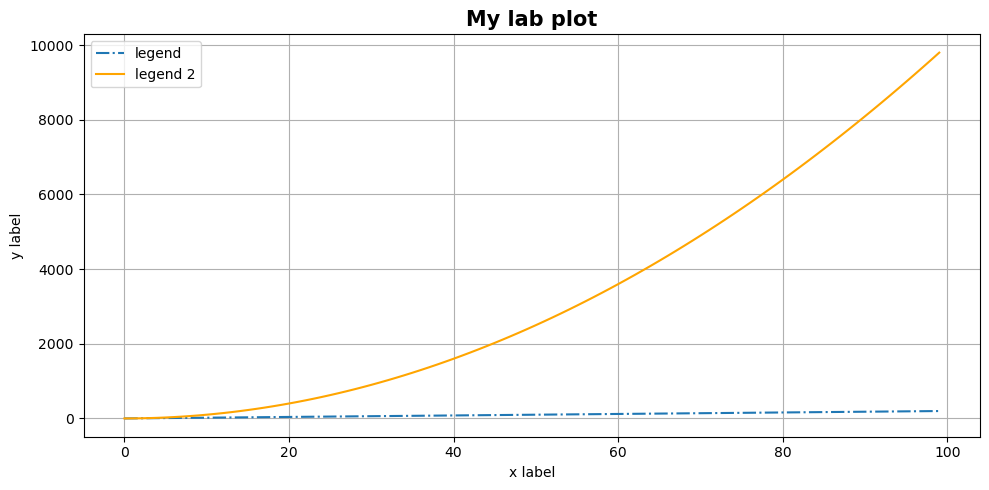

In [14]:
# Method 1
plt.figure(figsize=(10,5)) 
plt.plot(x,y, linestyle='-.', label = 'legend')

plt.xlabel('x label')
plt.ylabel('y label')

plt.plot(x,z, label= 'legend 2', c="orange")

plt.title("My lab plot", fontsize=15, fontweight='bold')
plt.legend()

plt.grid()

plt.tight_layout()
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

<Figure size 1000x500 with 0 Axes>

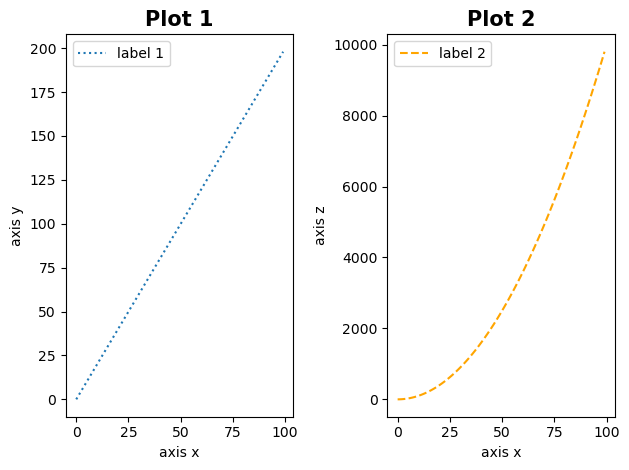

In [15]:
# Method 2
x = np.arange(0,100)
y = x*2
z = x**2

plt.figure(figsize=(10,5))
fig, [ax1, ax2] = plt.subplots(1,2)

ax1.plot(x,y, linestyle=":", label= "label 1" )
ax1.set_title('Plot 1', fontsize=15, fontweight='bold')
ax1.set_xlabel('axis x')
ax1.set_ylabel('axis y')
ax1.legend()

ax2.plot(x,z, '--', c='orange', label='label 2')
ax2.set_title('Plot 2',fontsize=15, fontweight='bold')
ax2.set_xlabel('axis x')
ax2.set_ylabel('axis z')
ax2.legend()

plt.tight_layout()
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

<Figure size 1000x500 with 0 Axes>

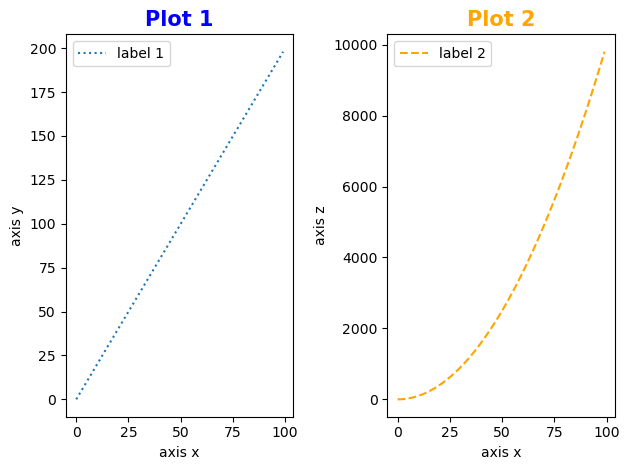

In [16]:
# your code here
x = np.arange(0,100)
y = x*2
z = x**2

plt.figure(figsize=(10,5 ))
fig, [ax1, ax2] = plt.subplots(1,2)

ax1.plot(x,y, linestyle=":", label= "label 1" )
ax1.set_title('Plot 1', c="blue", fontsize=15, fontweight='bold')
ax1.set_xlabel('axis x')
ax1.set_ylabel('axis y')
ax1.legend()

ax2.plot(x,z, '--', c='orange', label='label 2')
ax2.set_title('Plot 2', c='orange', fontsize=15, fontweight='bold')
ax2.set_xlabel('axis x')
ax2.set_ylabel('axis z')
ax2.legend()

plt.tight_layout()
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

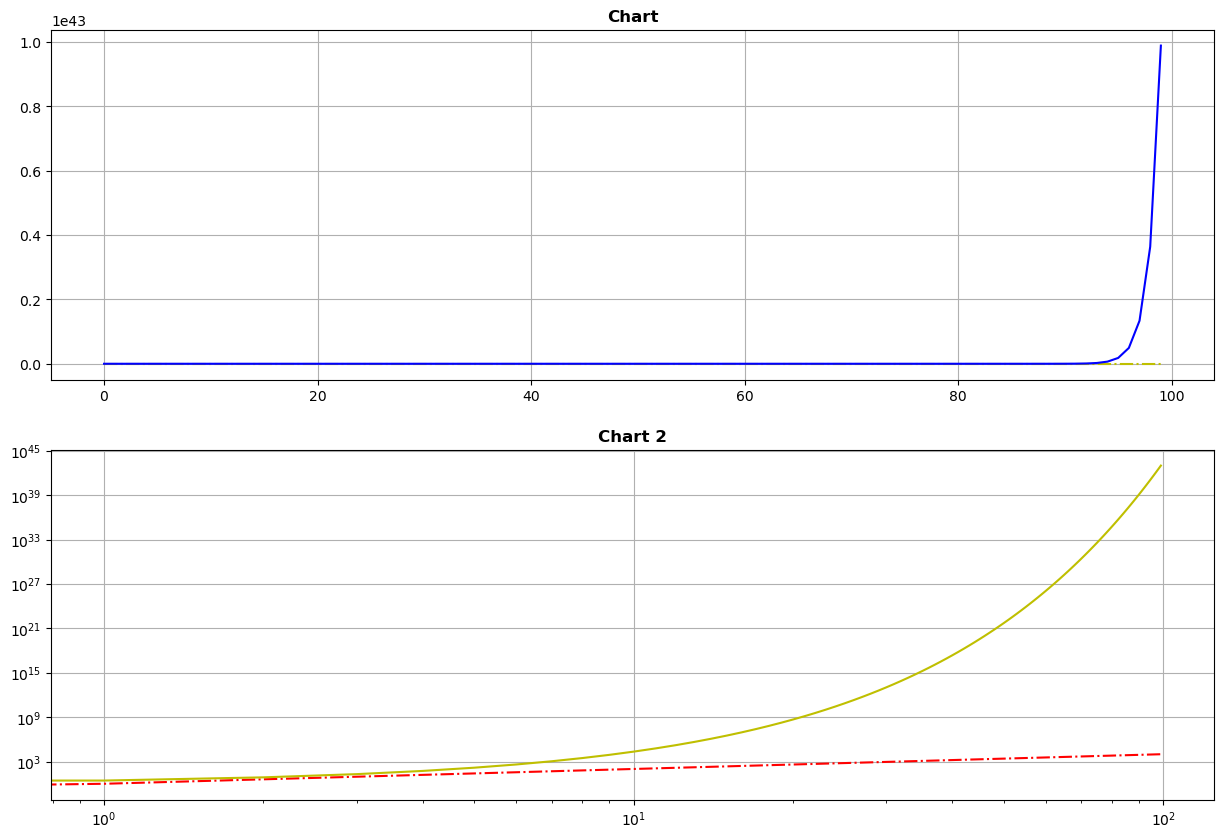

In [17]:
# your code here
x = np.arange(0,100)
y1 = x**2
y2 = np.exp(x)

fig, chart = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

chart[0].set_title('Chart',fontsize=12, fontweight='bold')
chart[0].plot(x, y1, 'y-.')
chart[0].plot(x, y2, 'b-')

chart[1].set_title('Chart 2', fontsize=12, fontweight='bold')
chart[1].plot(x, y1, 'r-.')
chart[1].plot(x, y2, 'y-')

chart[1].set_xscale('log')
chart[1].set_yscale('log')

chart[0].grid()
chart[1].grid()
plt.show()


#### As a bonus challenge, try to add a legend to the plot.

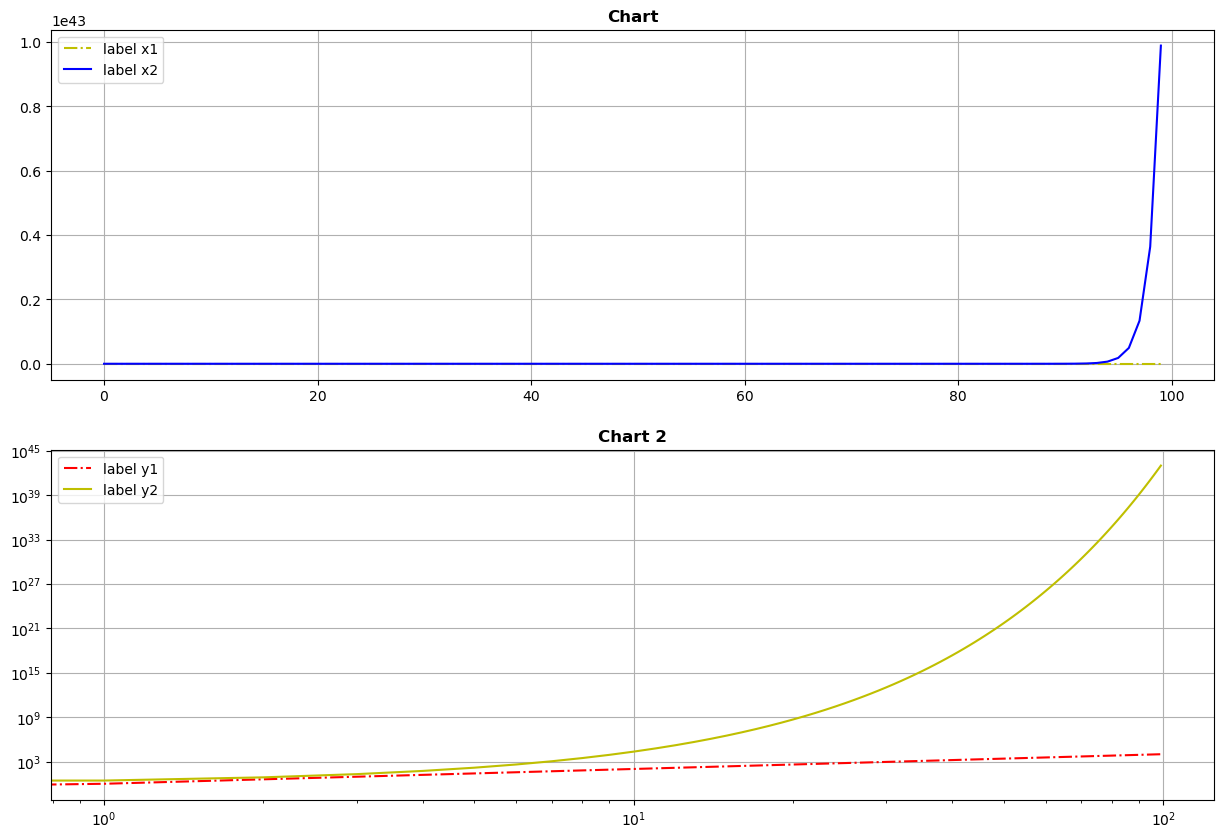

In [18]:
# your code here
x = np.arange(0,100)
y1 = x**2
y2 = np.exp(x)

fig, chart = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

chart[0].set_title('Chart',fontsize=12, fontweight='bold')
chart[0].plot(x, y1, 'y-.', label='label x1')
chart[0].plot(x, y2, 'b-', label='label x2')

chart[1].set_title('Chart 2', fontsize=12, fontweight='bold')
chart[1].plot(x, y1, 'r-.', label='label y1')
chart[1].plot(x, y2, 'y-', label='label y2')

chart[1].set_xscale('log')
chart[1].set_yscale('log')

chart[0].legend()
chart[1].legend()
chart[0].grid()
chart[1].grid()
plt.show()


## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [19]:
# your code here
import pandas as pd
fitbit= pd.read_csv("Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

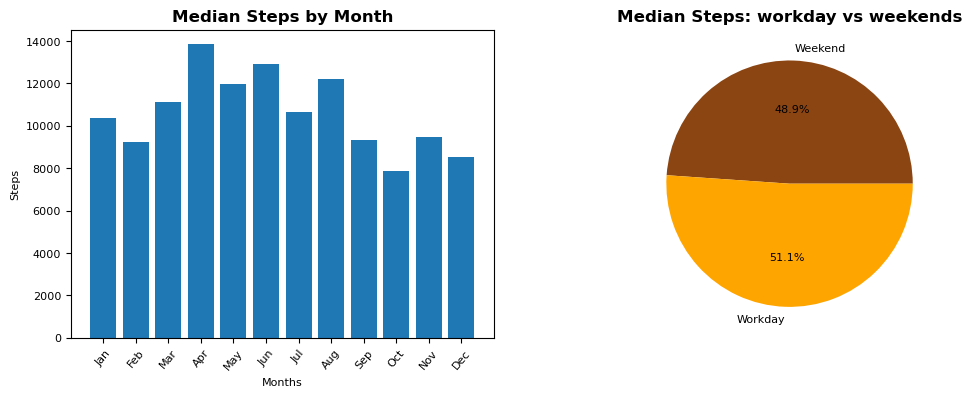

In [20]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

## average number of steps change by month -> groupby "steps" and "months encoded"
month = fitbit.groupby('Months_encoded')["Steps"].median()

# create the first plot, where i nedd to change the x axis -> name of months 
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)

plt.bar(month.index, month.values)
plt.xlabel('Months', fontsize=8)
plt.ylabel('Steps', fontsize=8)
plt.title('Median Steps by Month', fontweight='bold')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize= 8 ,rotation=50)
plt.yticks(fontsize=8)


# MEDIAN STEPS BY WORK_OR_WEEKEND
activity_work_weekend= fitbit.groupby('Work_or_Weekend')['Steps'].median()
plt.subplot(1,2,2)

#create a label to each part of the pie chart
label=['Weekend', 'Workday']

plt.pie(activity_work_weekend, labels=label, textprops={'fontsize': 8},autopct='%1.1f%%', colors=["saddlebrown","orange"]) #autopct='%1.1f%%' it's a function to put labels on pie chart 
plt.title('Median Steps: workday vs weekends',fontweight='bold' )



#Save the chart using plt.savefig
plt.savefig('figures/steps_and_activity.png')
plt.show()


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

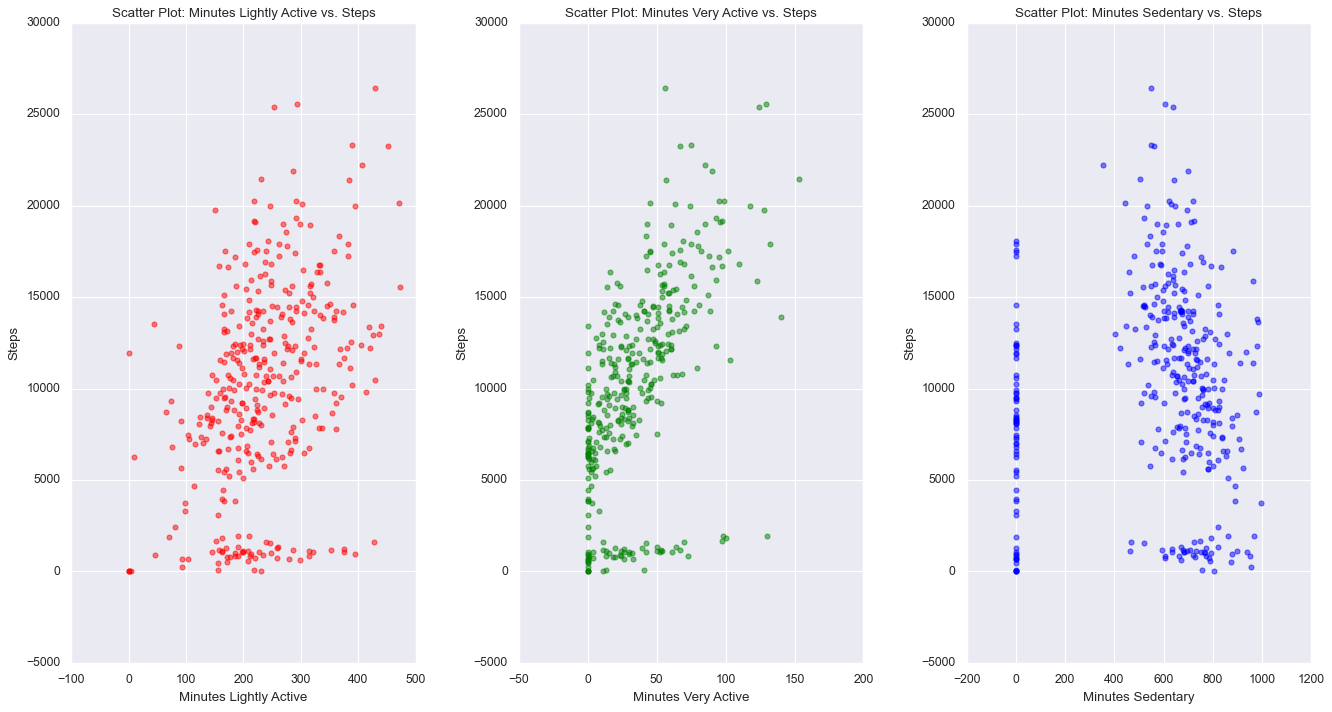

In [90]:
# your code here
feature_pairs = [('Minutes Lightly Active', 'Steps'),
                 ('Minutes Very Active', 'Steps'),
                 ('Minutes Sedentary', 'Steps')]


plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.3)  #space between plots
colors = ['red', 'green', 'blue'] 

for i, (x_feature, y_feature) in enumerate(feature_pairs, 1):
    plt.subplot(1, 3, i)
    plt.scatter(fitbit[x_feature], fitbit[y_feature], color=colors[i-1], marker='o', alpha=0.5)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Scatter Plot: {x_feature} vs. {y_feature}')
    plt.grid(True)  # Grid 

plt.savefig('figures/scatter_plots.png')


plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [22]:
# your code here
titanic= pd.read_csv("titanic.csv")
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [23]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [24]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=["float", "int"]).columns.to_list()


['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [25]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include=["object"]).columns.to_list()

['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [26]:
# your code here
from matplotlib import style
plt.figure(figsize=(12, 6))
plt.style.use('classic')

<Figure size 1200x600 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

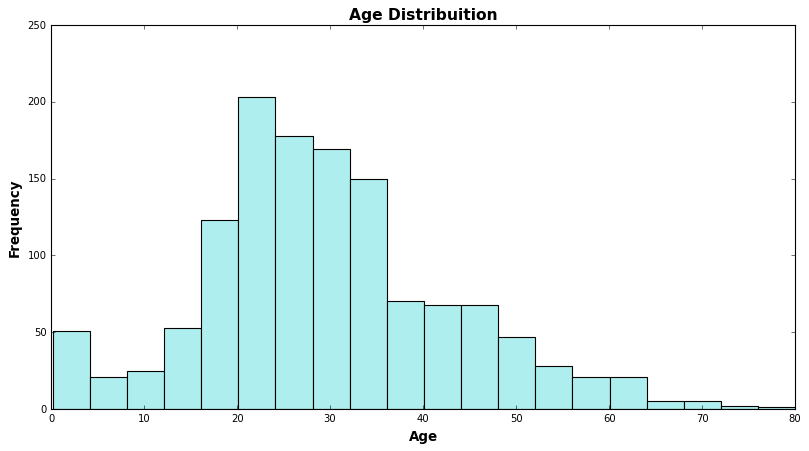

In [27]:
# your code here
fig, ax = plt.subplots(figsize=(12,6), facecolor="none")
ax.hist(titanic.Age,bins=20, color='paleturquoise')
plt.xlabel("Age",fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
plt.title("Age Distribuition", fontsize=14, fontweight='bold')

#change the axis values size
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)

plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

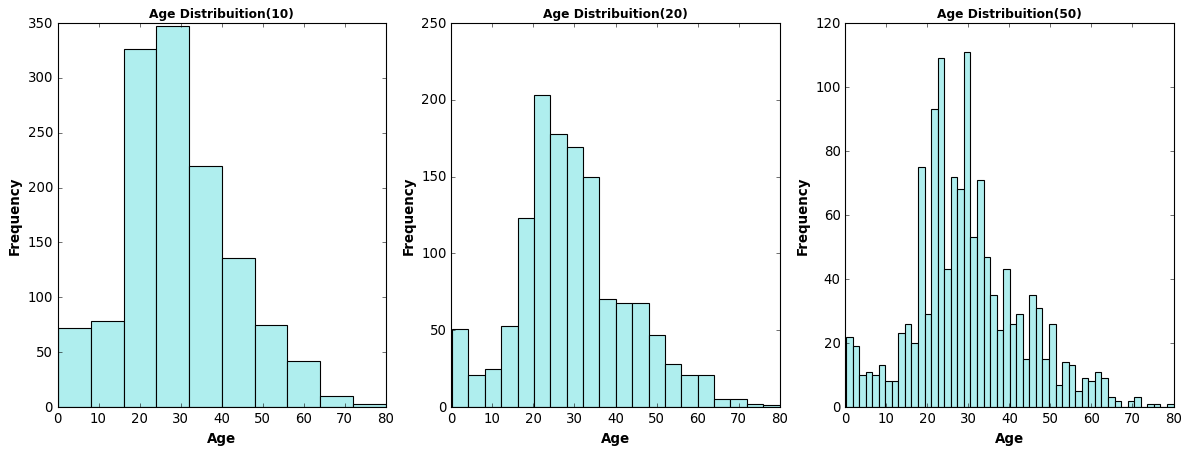

In [28]:
fig, ax = plt.subplots(nrows= 1, ncols=3, figsize=(18,6), facecolor="none")
#Age bins 10

ax[0].hist(titanic.Age,bins=10, color='paleturquoise')
ax[0].set_xlabel("Age",fontweight='bold')
ax[0].set_ylabel("Frequency", fontweight='bold')
ax[0].set_title("Age Distribuition(10)", fontsize=11, fontweight='bold')

ax[1].hist(titanic.Age,bins=20, color='paleturquoise')
ax[1].set_xlabel("Age",fontweight='bold')
ax[1].set_ylabel("Frequency", fontweight='bold')
ax[1].set_title("Age Distribuition(20)", fontsize=11, fontweight='bold')

ax[2].hist(titanic.Age,bins=50, color='paleturquoise')
ax[2].set_xlabel("Age",fontweight='bold')
ax[2].set_ylabel("Frequency", fontweight='bold')
ax[2].set_title("Age Distribuition(50)", fontsize=11, fontweight='bold')
plt.show()

#### How does the bin size affect your plot?

In [29]:
"""
Bins in histograms refers to the range of values that are grouped together in a single bar. 
The bin sizes affect the aparrence of histogram (ganularity). 

Having too many bins makes the histogram look messy, making it hard to see the real patterns.
However, if there are too few bins, the histogram won't show enough information to spot meaningful trends in the data. 
It's about finding the right balance for a clear understanding.
"""

"\nBins in histograms refers to the range of values that are grouped together in a single bar. \nThe bin sizes affect the aparrence of histogram (ganularity). \n\nHaving too many bins makes the histogram look messy, making it hard to see the real patterns.\nHowever, if there are too few bins, the histogram won't show enough information to spot meaningful trends in the data. \nIt's about finding the right balance for a clear understanding.\n"

#### Use seaborn to show the distribution of column `Age`.

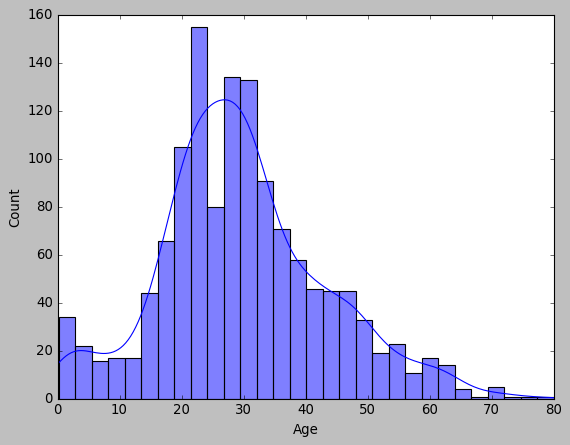

In [33]:
# your code here
import seaborn as sns

sns.histplot(data=titanic, x='Age', kde=True)

plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

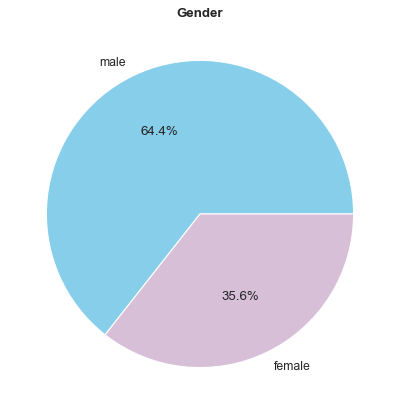

In [99]:
# Method 1 - matplotlib
# your code here

plot= titanic['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%', ylabel="", colors=['skyblue', 'thistle'])
plt.title("Gender", fontsize=12, fontweight="bold")

plt.show()



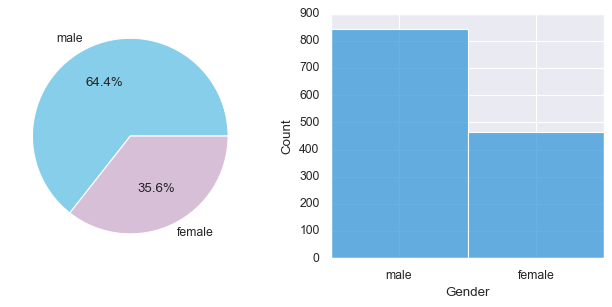

In [56]:
# Method 2 - seaborn
# your code here
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
gender = titanic['Gender'].value_counts()

ax[0].pie(gender, labels=[gender.index[0], gender.index[1]], autopct='%1.1f%%', colors=['skyblue', 'thistle'])
sns.set(rc={"axes.facecolor": "#EAEAF2"})  # To change the background color
ax = sns.histplot(data=titanic, x='Gender', color='#3498db')  # to change the bar color


plt.tight_layout()
plt.show()

#### Use the right plot to visualize the column `Pclass`.

In [102]:
# your code here
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S


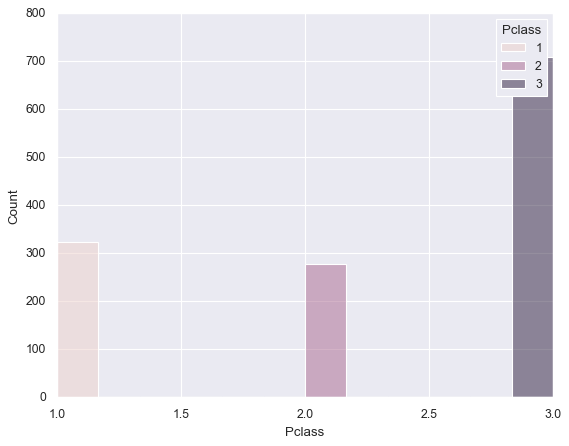

In [118]:
sns.histplot(data=titanic, x='Pclass', hue='Pclass')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

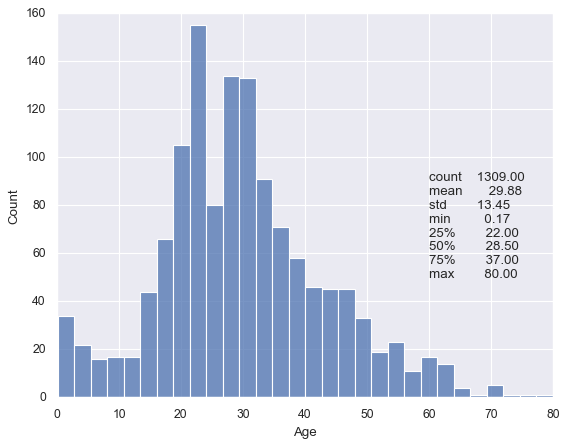

In [120]:
# your code here
ax = sns.histplot(data=titanic, x='Age')
ax.text(60,50, titanic.Age.describe().round(2).to_string())
plt.show()

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
We can perceive from the graph that the majority of the passengers died with 20-25 and 27-33 years old.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

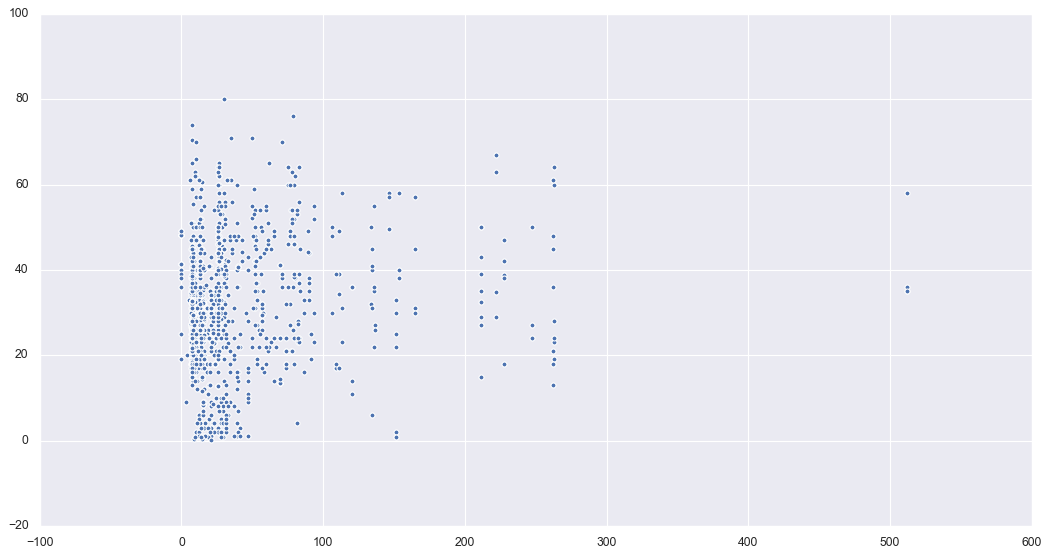

In [121]:
# Method 1 - matplotlib
# your code here
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(titanic.Fare, titanic.Age)
ax.grid(True)

plt.show()

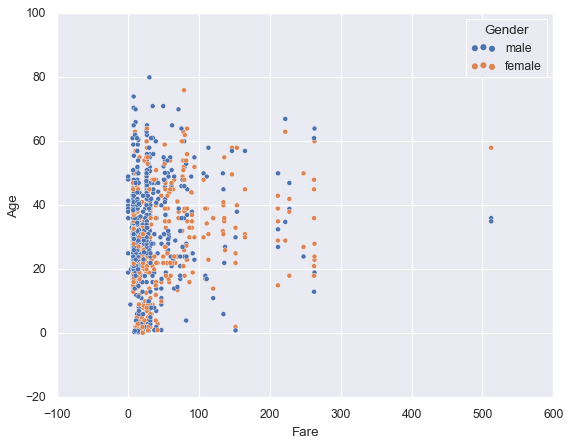

In [124]:
# Method 2 - seaborn
# your code here
sns.scatterplot(data=titanic, x='Fare', y='Age', hue='Gender')
plt.show()

#### Plot the correlation matrix using seaborn.

C:\Users\Ana\AppData\Local\Temp\ipykernel_10788\2096681223.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic.corr()


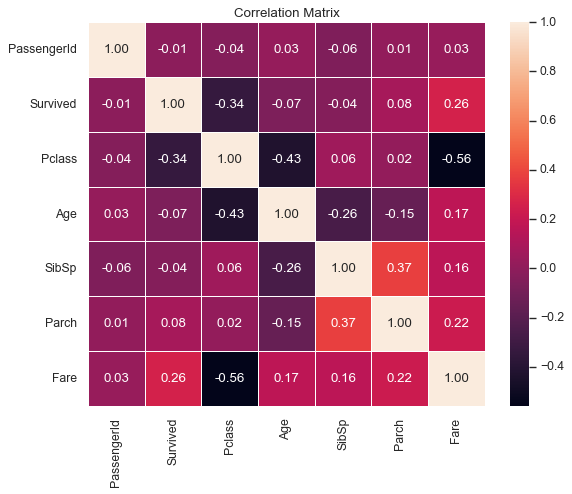

In [128]:
# your code here
correlation_matrix = titanic.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### What are the most correlated features?

In [ ]:
"""
Negative Correlations:

Fare and Pclass: Higher class, higher fare.
Age and Pclass: Older in higher class.
Pclass and Survived: Rich survived more.
Positive Correlations:

Parch and SibSp: More family, more siblings/spouses.
Fare and Survived: Pay more, better survival.
Fare and Parch: More family, higher fare.
These show how factors like class, age, family size, and fare were linked on the Titanic, affecting survival and costs.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

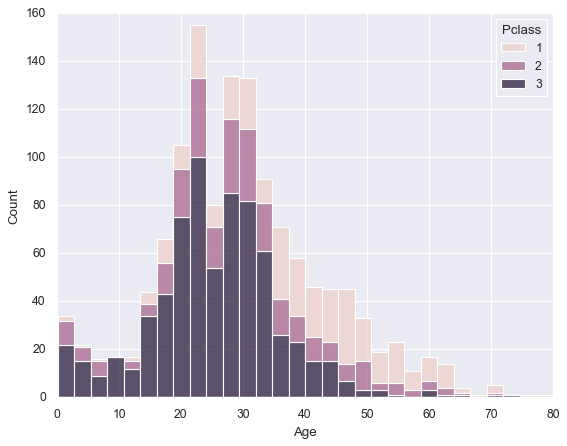

In [126]:
# your code here
sns.histplot(data=titanic, x='Age', hue='Pclass', multiple='stack')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

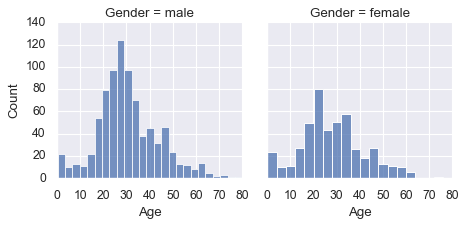

In [129]:
# your code here

g = sns.FacetGrid(titanic, col='Gender')
g.map_dataframe(sns.histplot, x="Age")

plt.show()